# 2. Random forests for image approximation

In [1]:
import pandas as pd
import numpy as np
from numpy import linalg as la
import math
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.cm as cm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from PIL import Image
import random

## 2.b & c Preprocessing the input & output

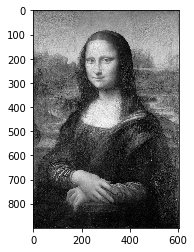

In [3]:
image_file = Image.open("/Users/zweedaothaiduy/Dropbox/Document/Study/Cornell Modules/Applied Machine Learning ECE5414/homework-4/random-forest/mona-lisa.jpg")
image_file.show()
color_image = image_file.convert('RGB')

pixel_colors = np.array(color_image.getdata()).reshape(image_file.size + (3,))
pixel_coordinates = np.moveaxis(np.indices(image_file.size), 0, 2)
pixels = np.dstack((pixel_coordinates, pixel_colors)).reshape((-1, 5))

pixel_df = pd.DataFrame(pixels, columns=["y", "x", "red","green","blue"])
pixel_df['gray'] = round(0.3 * pixel_df['red'] + 0.59 * pixel_df['green'] + 0.11 * pixel_df['blue'])
pixel_gray = np.array(pixel_df['gray'])
plt.imshow(pixel_gray.reshape(900,604), cmap= cm.Greys_r)

# sample 5000 random pixels
random_indices = random.choices(range(0,543599), k=5000)
train_data = pixel_df.loc[random_indices,['x','y']]
train_labels = pixel_df.loc[random_indices,'gray']

## 2.d Random Forest

/Users/zweedaothaiduy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


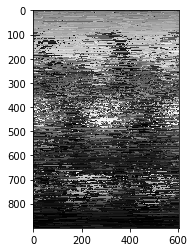

In [4]:
rf = RandomForestClassifier()
rf.fit(train_data, train_labels)

pixel_predict = rf.predict(pixel_df.loc[:,['x','y']])
plt.imshow(pixel_predict.reshape(900,604), cmap= cm.Greys_r)

## 2.e Experimentation

Text(0.5, 1.0, 'Trees = 1, Depth = 15')

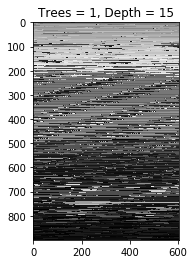

In [7]:
# i. Single tree
rf = RandomForestClassifier(n_estimators=1, max_depth=15)
rf.fit(train_data, train_labels)
pixel_predict = rf.predict(pixel_df.loc[:,['x','y']])

plt.imshow(pixel_predict.reshape(900,604), cmap= cm.Greys_r)
plt.title('Trees = 1, Depth = 15')


Text(0.5, 1.0, 'Trees = 100, Depth = 7')

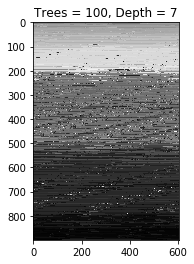

In [8]:
# ii. Depth = 7, multiple trees
rf = RandomForestClassifier(n_estimators=100, max_depth=7)
rf.fit(train_data, train_labels)
pixel_predict = rf.predict(pixel_df.loc[:,['x','y']])

plt.imshow(pixel_predict.reshape(900,604), cmap= cm.Greys_r)
plt.title('Trees = 100, Depth = 7')

Text(0.5, 1.0, 'k-NN')

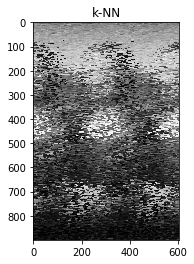

In [9]:
# iii. k-NN
knn = KNeighborsRegressor(n_neighbors = 1)
knn.fit(train_data, train_labels)
pixel_predict = knn.predict(pixel_df.loc[:,['x','y']])

plt.imshow(pixel_predict.reshape(900,604), cmap= cm.Greys_r)
plt.title('k-NN')

Text(0.5, 1.0, 'Trees = 100, Depth = unlimited')

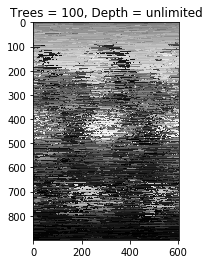

In [10]:
# iv. Prunning
rf = RandomForestClassifier(n_estimators=100)
rf.fit(train_data, train_labels)

pixel_predict = rf.predict(pixel_df.loc[:,['x','y']])
plt.imshow(pixel_predict.reshape(900,604), cmap= cm.Greys_r)
plt.title('Trees = 100, Depth = unlimited')